## Laboratorio 3
---  

Universidad Galileo  
Instituto de Investigación de Operaciones  
Maestría en Data Science  
Text Mining & Image Recognition, sección U  
Tercer ciclo 2023

**Sergio Josué Castillo Custodio, Carnet 202300331**

#### Cargando Librerías

In [27]:
import pandas as pd
import numpy as np
import re
import os
import spacy
import spacy.cli

### Solución
---

Instrucciones: A continuación verá una lista de ejercicios que debe completar para poder entregar el la hoja de trabajo #3. Al finalizar, todos sus archivos deben estar contenidos en un archivo ht3-sucarnet.zip. Este archivo lo debe entregar en el link del GES. Por favor cree una carpeta para cada ejercicio que usted realice.

##### **Problema 1**
Utilice expresiones regulares para validar las siguintes situaciones:

**1. Implemente una regex para validar un correo electrónico en general**

In [59]:
# Definiendo función
def mail_val(mail):
    """
        \b indica límites de la expresión.
        El término [A-Za-z0-9._%+-]+ incluye números, letras mayúsculas/minúsculas y carácteres especiales selectos.
        El + al final indica que puede haber uno o más elementos del primer término, repetidos cuantas veces sea.
        El término [A-Za-z0-9.-]+ incluye números, letras mayúsculas/minúsculas, que con el símbolo + al final pueden
        estar repetidos cuantas veces sea necesario, al menos una vez.
        El término \.[A-Z|a-z]{2,7} indica que debe haber un punto presente seguido de una cadena de letras
        mayúsculas/minusculas de longitud entre 2 y 7 carácteres.
    """
    compstr = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
    if (re.fullmatch(compstr, mail)):
        print(f'Correo electrónico ({mail}) VÁLIDO.')
    else:
        print(f'Correo electrónico ({mail}) NO VÁLIDO.')
# Probando función
mail_val('Guate.360-porelmundo@miguate.com')

Correo electrónico (Guate.360-porelmundo@miguate.com) VÁLIDO.


**2. Implemente una regex para validar la dirección url de una página web con los tipos de domino (.com, .org, .edu).**

In [58]:
# Definiendo función
def url_val(url):
    """
        El término https? indica que debe haber una cadena como http o https. El ? después de la letra s indica que
        esta letra puede o no estar incluida.
        El término :\/\/ construye la parte :// de las direcciones url.
        El término ?:www\.|(?!www)) indica que debe haber una cadena www seguida de un punto, proveyendo dos opciones,
        la segunda con negative lookahead.
        El término [a-zA-Z0-9][a-zA-Z0-9-]+ indica que debe haber una cadena de texto formada por número, letras 
        mayúsculas/minúsculas y carácteres especiales selectos ('-'), con una longitud de al menos dos carácteres.
        El término (?:com|org|edu) indica que la cadena puede terminar con una de tres opciones, según lo solicitado 'com'
        'edu', 'org'.
    """
    compstr = r'https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+\.(?:com|org|edu)'
    if (re.fullmatch(compstr, url)):
        print(f'URL ({url}) VÁLIDA.')
    else:
        print(f'URL ({url}) NO VÁLIDA.')
# Probando función
url_val('http://www.a.com')

URL (http://www.a.com) NO VÁLIDA.


**3. Implemente una regex para validar una MAC Address, notar que las mac addres están divididas en 6 bloques de caracteres hexadecimales, es decir que los símbolos solo pueden variar del 0 al 9 y las letras de la A a la F.**

In [61]:
# Definiendo función
def mac_val(mac):
    """
        ^ indica el inicio de la expresión regular.
        El término ([0-9A-Fa-f]{2}[\s:-]){5} indica que una cadena de dos carácteres que pueden ser dígitos del 0 al 9
        o letras mayúsculas/minúsculas de la A a la F, seguido ya sea de un espacio en blanco, dos puntos (':') o un
        guión ('-') se repite cinco veces.
        El término ([0-9A-Fa-f]{2}) indica que una cadena de dos carácteres que pueden ser dígitos del 0 al 9
        o letras mayúsculas/minúsculas de la A a la F, se repite una sola vez.
        $ fin de la expresión regular.
    """
    compstr = r'^([0-9A-Fa-f]{2}[\s:-]){5}([0-9A-Fa-f]{2})$'
    if (re.fullmatch(compstr, mac)):
        print(f'Dirección MAC ({mac}) VÁLIDA.')
    else:
        print(f'Dirección MAC ({mac}) NO VÁLIDA.')
# Probando función
mac_val('5A 6F AF 8C 9B 1D')

Dirección MAC (5A 6F AF 8C 9B 1D) VÁLIDA.


**4. Implemente una regex para validar una dirección IPv4, notar que las direcciones IPv4 están divididas en 4 bloques de valores los cuales solo pueden ir desde 0 hasta 255, una ip donde algunos de sus bloques sea mayor a 255 no es valida, además tome en cuenta que cada bloque está separada por un punto.**

In [60]:
# Definiendo función
def ipv4_val(ipstr):
    """
        ^ indica el inicio de la expresión regular.
        (?:(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3} indca que una cadena que empieza en 25 puede estar seguida 
        de número del 0 al 5; o que una cadena que empieza en 2, puede estar seguida de número del 0 al 49; o que una
        cadena puede empezar en 0 y llegar hasta 199, dejando como opcionales el primer y tercer carácter. Cualquiera
        de estas opciones esta seguida de un punto y se repite 3 veces.
        (?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?) indca que una cadena que empieza en 25 puede estar seguida 
        de número del 0 al 5; o que una cadena que empieza en 2, puede estar seguida de número del 0 al 49; o que una
        cadena puede empezar en 0 y llegar hasta 199, dejando como opcionales el primer y tercer carácter.
        $ fin de la expresión regular.
    """
    compstr = r'^(?:(?:25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
    if (re.fullmatch(compstr, ipstr)):
        print(f'Dirección IPv4 ({ipstr}) VÁLIDA.')
    else:
        print(f'Dirección IPv4 ({ipstr}) NO VÁLIDA.')
# Probando función
ipv4_val('255.16.8.1')

Dirección IPv4 (255.16.8.1) VÁLIDA.


**5. Implemente una regex para validar una fecha con la secuencia día-mes-año donde el día, mes y año puedan estar separados ya sea por el caracter / o el caracter - o el caracter ., notar que las fechas son validas si los si los días están definidos desde el 1 al 31, el mes del 1 al 12 y el año de 2000 al 2019. También debe tomar en cuenta que los días y meses pueden estar escritos ya sea con uno o dos caracteres por ejemplo: Enero puede escribirse como 1 o como 01. Los años también pueden expresarse ya sea con dos o con cuatro caracteres por ejemplo: 19 o 2019 son validos.**

In [66]:
# Definiendo función
def date_val(date):
    """
        ([0-2]?[1-9]|[1-3]0|31) son las posibilidades para los días del mes. La primera parte se refiere a todos los números desde el 1 al 29, excluyendo 10, 20 y 30.
        La segunda parte considera los números 10, 20 y 30 y la última posibilidad considera al número 31. Se considera que un cero pueda o no anteponerse a los números
        de un solo dígito.
        [\/\-.] son los posibles separadores entre los días y el mes en la cadena de texto que conforma la fecha.
        (0?[1-9]|10|11|12) son las posibilidades para los meses. La primera opción considera los números del 1 al 9, la segunda, tercera y cuarta opción considera
        los meses 10, 11 y 12 respectivamente. Se considera que un cero pueda o no anteponerse a los números de un solo dígito.
        [\/\-.] son los posibles separadores entre el mes y el año en la cadena de texto que conforma la fecha.
        ((20)?0[0-9]|(20)?1[0-9]) son las posibilidades para los años. En primer lugar se añade los primeros dos dígitos '20' o no al año. La primera opción considera
        los años del 2000 al 2009. La segunda opción considera los años del 2010 al 2019.
    """
    compstr = r'^([0-2]?[1-9]|[1-3]0|31)[\/\-.](0?[1-9]|10|11|12)[\/\-.]((20)?0[0-9]|(20)?1[0-9])$'
    if (re.fullmatch(compstr, date)):
        print(f'Fecha ({date}) VÁLIDA.')
    else:
        print(f'Fecha ({date}) NO VÁLIDA.')
# Probando función
date_val('12-12-02')

Fecha (12-12-02) VÁLIDA.


##### **Problema 2**
En la carpeta encontrará adjuntos 21 documentos que tiene 100 fechas en la secuencia días-mes-año pero con distinto separador y distinto formato de mes, en algunos casos aparece un numero y en otros el nombre del mes en ingles, por ejemplo: Enero pueder aparecer como 1 o como Jan.

Utilice Python y expresiones regulares para encontrar el día, mes y año promedio total del los 21 archivos, los resultados deben ser un double.

In [3]:
# Construyendo ubicación de archivos
dataPath = os.path.abspath('') + '/HT3/Datos'
# Obteniendo listado de documentos
listaDocs = os.listdir(dataPath)
# Construyendo dataFrame con todos los documentos
fechastxt = pd.concat((pd.read_csv(dataPath + '/' + file, header = None, index_col=None, delimiter = '\t') for file in listaDocs), ignore_index=True)
# Renombrando columnas
fechastxt.rename(columns = {0:'date'}, inplace = True)
# Desplegando resultado
fechastxt

,date
0,30-Jun-2019
1,20-Nov-2016
2,20-Aug-2018
3,04-Mar-2016
4,02-Mar-2019
...,...
20995,19/07/2017
20996,18/07/2016
20997,16/10/2018
20998,07/05/2016


In [4]:
fechastxt[['day', 'month', 'year']] = fechastxt['date'].str.split(r'\/|\-|\.', expand=True)
fechastxt

,date,day,month,year
0,30-Jun-2019,30,Jun,2019
1,20-Nov-2016,20,Nov,2016
2,20-Aug-2018,20,Aug,2018
3,04-Mar-2016,04,Mar,2016
4,02-Mar-2019,02,Mar,2019
...,...,...,...,...
20995,19/07/2017,19,07,2017
20996,18/07/2016,18,07,2016
20997,16/10/2018,16,10,2018
20998,07/05/2016,07,05,2016


In [13]:
# Reemplazando meses almacenados con nombre del mes por el número correspondiente
fechastxt['month']=fechastxt['month'].replace('Jan','1')
fechastxt['month']=fechastxt['month'].replace('Feb','2')
fechastxt['month']=fechastxt['month'].replace('Mar','3')
fechastxt['month']=fechastxt['month'].replace('Apr','4')
fechastxt['month']=fechastxt['month'].replace('May','5')
fechastxt['month']=fechastxt['month'].replace('Jun','6')
fechastxt['month']=fechastxt['month'].replace('Jul','7')
fechastxt['month']=fechastxt['month'].replace('Aug','8')
fechastxt['month']=fechastxt['month'].replace('Sep','9')
fechastxt['month']=fechastxt['month'].replace('Oct','10')
fechastxt['month']=fechastxt['month'].replace('Nov','11')
fechastxt['month']=fechastxt['month'].replace('Dec','12')
# Desplegando resultados
fechastxt

,date,day,month,year
0,30-Jun-2019,30,6,2019
1,20-Nov-2016,20,11,2016
2,20-Aug-2018,20,8,2018
3,04-Mar-2016,04,3,2016
4,02-Mar-2019,02,3,2019
...,...,...,...,...
20995,19/07/2017,19,07,2017
20996,18/07/2016,18,07,2016
20997,16/10/2018,16,10,2018
20998,07/05/2016,07,05,2016


In [19]:
# Convirtiendo datos de día, mes y año a entero
fechastxt['day']=fechastxt['day'].astype(int)
fechastxt['month']=fechastxt['month'].astype(int)
fechastxt['year']=fechastxt['year'].astype(int)
# Desplegando resultados
fechastxt

,date,day,month,year
0,30-Jun-2019,30,6,2019
1,20-Nov-2016,20,11,2016
2,20-Aug-2018,20,8,2018
3,04-Mar-2016,4,3,2016
4,02-Mar-2019,2,3,2019
...,...,...,...,...
20995,19/07/2017,19,7,2017
20996,18/07/2016,18,7,2016
20997,16/10/2018,16,10,2018
20998,07/05/2016,7,5,2016


In [26]:
# Encontrando promedios
print('De las 21,000 fechas consideradas, el promedio de los días es: ', round(fechastxt['day'].mean(),2))
print('De las 21,000 fechas consideradas, el promedio de los meses es: ', round(fechastxt['month'].mean(),2))
print('De las 21,000 fechas consideradas, el promedio de los años es: ', round(fechastxt['year'].mean(),2))

De las 21,000 fechas consideradas, el promedio de los días es:  15.62
De las 21,000 fechas consideradas, el promedio de los meses es:  6.47
De las 21,000 fechas consideradas, el promedio de los años es:  2016.69


##### **Problema 3**
Descargue el Dataset (de click aquí para descargar) el cual contiene aproximadamente 800,000 tweets de diversos temas.
Usando CoLab y expresiones regulares. Determine los 3 usuarios más populares dentro del dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:

  * Content: Tweet.
  * Metadata: ID, Timestamp, Length (este valor hay que calcularlo).

Posterior a tener sus 3 corpus creados, responda: ¿Razón por la que citan a ese usuario? para esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que más rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:

  1. Remover stopwords.
  2. Realizar stemming y lemmatizaci ́on.
  3. Mostrar un wordcloud con el top 10 para cada usuario.

In [29]:
# Cargando modelo de lenguaje
nlp_en_md = spacy.load("en_core_web_md")

In [38]:
# Cargando dataset
tweetsDataset = pd.read_csv('tw_source.csv', encoding='latin-1', header = None, index_col=None)
tweetsDataset.head()
# Eliminando columnas innecesarias
tweetsDataset.drop([0], axis = 1, inplace = True)
# Renombrando columnas
tweetsDataset.rename(columns = {1:'id', 2:'timestamp', 3:'query', 4:'user', 5:'content'}, inplace = True)
# Calculando longitud de cada tweet
tweetsDataset['length'] = tweetsDataset['content'].apply(len)
# Desplegando resultados
tweetsDataset

,id,timestamp,query,user,content,length
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...,...,...,...
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65


In [ ]:
# Definiendo expresión regular para encontrar usuarios de twitter
twt_handle = r'@[a-zA-Z0-9_]{1,15}'
# Creando array para guardar todos los usuarios citados
tags = []
alltags = []
tagged_users = []
# Analizando cada tweet
for index, row in tweetsDataset.iterrows():
    tags = re.findall(twt_handle, row['content'])
    alltags.extend(tags)
alltags

In [76]:
# Identificando usuarios más citados

# Copiando lista de usuarios citados a un dataframe
tagged_users = pd.DataFrame(alltags)
# Renombrando columnas
tagged_users.rename(columns = {0:'user'}, inplace = True)
# Contando ocurrencias de cada usuario
tagged_users.groupby(['user'])['user'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(3)

,user,count
266359,@mileycyrus,4500
337104,@tommcfly,3887
175736,@ddlovato,3467


Los tres usuarios más populares en los tweets analizados son:
  - @mileycyrus
  - @tommcfly
  - @ddlovato

Ahora se determinará si en cada tweet se menciona a alguno de estos tres usuarios.

In [82]:
# Obteniendo corpus de tweets que mencionan a @mileycyrus
top1corpus = tweetsDataset[tweetsDataset['content'].str.match(r'@mileycyrus')].loc[:, ['id', 'timestamp', 'length', 'content']]
top1corpus

,id,timestamp,length,content
1021,1468063101,Mon Apr 06 23:30:57 PDT 2009,107,@mileycyrus hahaha dont be like that one time ...
2014,1468286517,Tue Apr 07 00:45:20 PDT 2009,137,"@mileycyrus i have the same problem, but it's ..."
2073,1468297110,Tue Apr 07 00:49:07 PDT 2009,72,@mileycyrus I guess counting sheep didn't work...
2080,1468298918,Tue Apr 07 00:49:44 PDT 2009,100,@mileycyrus I would too if it meant spending a...
2156,1468318249,Tue Apr 07 00:56:41 PDT 2009,112,@mileycyrus AWWW u seriously have the cutest d...
...,...,...,...,...
1593394,2191925952,Tue Jun 16 06:12:46 PDT 2009,77,@mileycyrus: milees! when can we listen your n...
1596796,2192768714,Tue Jun 16 07:31:21 PDT 2009,112,@mileycyrus http://twitpic.com/7f5fy - I love ...
1597905,2193052811,Tue Jun 16 07:55:55 PDT 2009,74,@mileycyrus i see the photos of your KISS iss ...
1598348,2193155701,Tue Jun 16 08:04:20 PDT 2009,139,@mileycyrus i am definitley definitley getting...


In [83]:
# Obteniendo corpus de tweets que mencionan a @tommcfly
top2corpus = tweetsDataset[tweetsDataset['content'].str.match(r'@tommcfly')].loc[:, ['id', 'timestamp', 'length', 'content']]
top2corpus

,id,timestamp,length,content
1690,1468210813,Tue Apr 07 00:19:09 PDT 2009,138,@tommcfly hey saw u guys play @ pushover..didn...
1789,1468233211,Tue Apr 07 00:26:52 PDT 2009,131,@tommcfly Good morning Tom! Why can't I send y...
2514,1468391638,Tue Apr 07 01:23:07 PDT 2009,96,@tommcfly did you know that johnsons baby use ...
3524,1468618787,Tue Apr 07 02:46:02 PDT 2009,131,"@tommcfly hey, no chance of adding brighton or..."
3783,1468674970,Tue Apr 07 03:05:49 PDT 2009,82,"@tommcfly have fun tom, i need to buy eclipse ..."
...,...,...,...,...
1594579,2192184544,Tue Jun 16 06:38:47 PDT 2009,106,"@tommcfly When the sun shines, they slip into ..."
1594946,2192269225,Tue Jun 16 06:46:41 PDT 2009,46,@tommcfly you should record Star Girl with JB
1595131,2192311895,Tue Jun 16 06:50:40 PDT 2009,125,@tommcfly why you at the studio then? just wa...
1595194,2192315339,Tue Jun 16 06:50:59 PDT 2009,71,@tommcfly Gonna make a trip to England in the ...


In [84]:
# Obteniendo corpus de tweets que mencionan a @ddlovato
top3corpus = tweetsDataset[tweetsDataset['content'].str.match(r'@ddlovato')].loc[:, ['id', 'timestamp', 'length', 'content']]
top3corpus

,id,timestamp,length,content
460,1467929230,Mon Apr 06 22:51:34 PDT 2009,47,@ddlovato @David_Henrie ummmmm i cant find it.
573,1467953367,Mon Apr 06 22:58:30 PDT 2009,40,@ddlovato Do you hate us?? Please don't
7032,1469661950,Tue Apr 07 07:02:58 PDT 2009,96,@ddlovato Wish that i could see it.. Thats th...
7089,1469674492,Tue Apr 07 07:05:11 PDT 2009,79,"@ddlovato hey demi, wen are you and selena gon..."
8611,1548280868,Fri Apr 17 20:31:31 PDT 2009,85,@ddlovato ahhhh i wish i could go to the dalla...
...,...,...,...,...
1590266,2191372145,Tue Jun 16 05:08:09 PDT 2009,92,@ddlovato is there a deluxe edition cause then...
1590351,2191386240,Tue Jun 16 05:09:58 PDT 2009,72,"@ddlovato Hahaha Demi, naughty Demi! I love y..."
1592766,2191807303,Tue Jun 16 06:00:23 PDT 2009,31,@ddlovato hope to see you soon
1593330,2191922960,Tue Jun 16 06:12:27 PDT 2009,36,@ddlovato I VOTED!! =]]] can't wait


In [85]:
# Selecccionando columna de content, pues es la que aporta el contexto
top1corpus = top1corpus['content']
top2corpus = top2corpus['content']
top3corpus = top3corpus['content']

In [86]:
# Definiendo funciones para tratamiento del corpus de cada usuario

def norm(corpus):
       """ 
              Función para normalización de texto, eliminando carácteres especiales y convirtiendo todo a minúsculas.
       """
       corpusNorm = []
       for doc in corpus:
              corpusNorm.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
       return corpusNorm

def tokens(corpus):
       """
              Función para tokenizar cada elemento del corpus utilizando el modelo de lenguaje en_core_web_md
       """
       corpusToken = []
       for doc in corpus:
              corpusToken.append(nlp_en_md(doc))
       return corpusToken

def stopWs(corpus):
       """
              Función para remover stop-words de cada elemento del corpus utilizando el modelo de lenguaje en_core_web_md
       """
       corpusStop = []
       for doc in corpus:
              s = ''
              for token in doc:
                     if(token.is_stop == False):
                            s = s + token.text + ' '
              corpusStop.append(s.strip())
       return corpusStop

def stemNlem(corpus):
       """
              Función para aplicar stemming y lemming a cada elemento del corpus utilizando el modelo de lenguaje en_core_web_md
       """
       documentos = tokens(corpus)
       corpusSL = []
       for doc in documentos:
              s = ''
              for token in doc:
                     s = s + token.lemma_ + ' '
              corpusSL.append(s.strip())
       return corpusSL

In [87]:
# Procesando corpus de cada usuario

# Usuario @mileycyrus
# 1. Normalización
top1corpus = norm(top1corpus)
# 2. Tokenización
top1corpus = tokens(top1corpus)
# 3. Remoción de stop-words
top1corpus = stopWs(top1corpus)
# 4. Stemming and Lemming
top1corpus = stemNlem(top1corpus)
# Desplegando resultado de muestra
top1corpus[0]

'mileycyrus hahaha not like time ny get 30 min sleep get sick    love'

In [88]:
# Procesando corpus de cada usuario

# Usuario @tommcfly
# 1. Normalización
top2corpus = norm(top2corpus)
# 2. Tokenización
top2corpus = tokens(top2corpus)
# 3. Remoción de stop-words
top2corpus = stopWs(top2corpus)
# 4. Stemming and Lemming
top2corpus = stemNlem(top2corpus)
# Desplegando resultado de muestra
top2corpus[0]

'tommcfly hey see u guy play    pushoverdidnt 2 meet u tho cuz th huge line    upset    lola msg 4'

In [89]:
# Procesando corpus de cada usuario

# Usuario @ddlovato
# 1. Normalización
top3corpus = norm(top3corpus)
# 2. Tokenización
top3corpus = tokens(top3corpus)
# 3. Remoción de stop-words
top3corpus = stopWs(top3corpus)
# 4. Stemming and Lemming
top3corpus = stemNlem(top3corpus)
# Desplegando resultado de muestra
top3corpus[0]

'ddlovato davidhenrie ummmmm not find'

In [101]:
# Creando matrices TF para cada corpus

# Definiendo funciones a utilizar

def listToString(termList):
       strX = ""
       for word in termList:
              strX = strX + word + ' '
       return strX

def generateEmptyTF(cols, rows):
       eTF = pd.DataFrame(index=rows, columns=cols)
       eTF = eTF.fillna(0)
       return eTF

def calculateTF(corpus, df):
       corpus = tokens(corpus)
       for index, doc in enumerate(corpus):
              for token in doc:
                     try:
                            colIndex = list(df.columns).index(token.text)
                            df.iloc[index, colIndex] =  df.iloc[index, colIndex] + 1
                     except:
                            pass
       return df

In [102]:
# Matriz TF para top1corpus

# Convirtiendo corpus en string
str1Corpus = listToString(top1corpus)
# Determinando total de palabras
totwords1 = len(str1Corpus)
# Creando conjunto de palabras
str1Corpus = str1Corpus.strip().split(' ')
set1Corpus = set(str1Corpus)
# Determinando número de palabras únicas
wordsn1 = len(set1Corpus)
# Determinando número de filas y columnas de la matriz TF
corpusCols = list(set1Corpus)
corpusRows = range(0, totwords1)
# Creando matriz TF vacía
tfCorpus1 = generateEmptyTF(corpusCols, corpusRows)
# Calculando matriz TF (absoluta)
tfMatrix1 = calculateTF(top1corpus, tfCorpus1)
# Desplegando resultados
tfMatrix1

,,offense,area,vostro,keen,anytingsorry,kaeli,truoble,constantly,wishlolplease,...,honey,winner,loveeee,httptwitpiccom67hac,pwn,pass,way,live,pennsylvania,bethan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Obteniendo total de palabras
tfMatrix1.loc['Total'] = tfMatrix1.sum(numeric_only=True, axis=0)
tfMatrix1

,,offense,area,vostro,keen,anytingsorry,kaeli,truoble,constantly,wishlolplease,...,honey,winner,loveeee,httptwitpiccom67hac,pwn,pass,way,live,pennsylvania,bethan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Conservando totales de cada palabra
wordscount1 = tfMatrix1.loc['Total']

# Seleccionando top 10

# Ordenando palabras
wordscount1 = wordscount1.sort_values(ascending=False)
#Creando nuevo dataframe con palabras y conteos como valores
top10 = pd.DataFrame(list(zip(list(wordscount1.index),wordscount1)))
# Excluyendo palabras con una longitud menor a 2 debido a que agregan poco contexto
top10 = top10[top10[0].apply(len)>2]
# Seleccionando top10 de valores. Se seleccionan 11 porque la palabra más común es el user de twitter.
top10 = top10.sort_values([1], ascending=False).head(11)
# Convirtiendo a diccionario para graficar Wordcloud
top10dict = {list(top10[0])[i]: list(top10[1])[i] for i in range(len(list(top10[0])))}
# Desplegando resultado
top10dict

{'mileycyrus': 3831,
 'miley': 798,
 'love': 750,
 'not': 637,
 'good': 398,
 'vote': 356,
 'come': 304,
 'hope': 263,
 'like': 218,
 'win': 201,
 'amazing': 171}

In [137]:
# Matriz TF para top2corpus

# Convirtiendo corpus en string
str2Corpus = listToString(top2corpus)
# Determinando total de palabras
totwords2 = len(str2Corpus)
# Creando conjunto de palabras
str2Corpus = str2Corpus.strip().split(' ')
set2Corpus = set(str2Corpus)
# Determinando número de palabras únicas
wordsn2 = len(set2Corpus)
# Determinando número de filas y columnas de la matriz TF
corpusCols = list(set2Corpus)
corpusRows = range(0, totwords2)
# Creando matriz TF vacía
tfCorpus2 = generateEmptyTF(corpusCols, corpusRows)
# Calculando matriz TF (absoluta)
tfMatrix2 = calculateTF(top2corpus, tfCorpus2)
# Desplegando resultados
tfMatrix2

,,offense,sasha,constantly,darlington,roast,mcflytosweden,httptwitpiccom4i90j,jumbo,httptwitpiccom6r10o,...,honey,quottweet,witch,pass,way,quotmcfly,faustao,live,guythat,suicidal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Obteniendo total de palabras
tfMatrix2.loc['Total'] = tfMatrix2.sum(numeric_only=True, axis=0)
tfMatrix2

,,offense,sasha,constantly,darlington,roast,mcflytosweden,httptwitpiccom4i90j,jumbo,httptwitpiccom6r10o,...,honey,quottweet,witch,pass,way,quotmcfly,faustao,live,guythat,suicidal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Conservando totales de cada palabra
wordscount2 = tfMatrix2.loc['Total']

# Seleccionando top 10

# Ordenando palabras
wordscount2 = wordscount2.sort_values(ascending=False)
#Creando nuevo dataframe con palabras y conteos como valores
top102 = pd.DataFrame(list(zip(list(wordscount2.index),wordscount2)))
# Excluyendo palabras con una longitud menor a 2 debido a que agregan poco contexto
top102 = top102[top102[0].apply(len)>2]
# Seleccionando top10 de valores. Se seleccionan 11 porque la palabra más común es el user de twitter.
top102 = top102.sort_values([1], ascending=False).head(11)
# Convirtiendo a diccionario para graficar Wordcloud
top10dict2 = {list(top102[0])[i]: list(top102[1])[i] for i in range(len(list(top102[0])))}
# Desplegando resultado
top10dict2

{'tommcfly': 3631,
 'not': 756,
 'tom': 664,
 'love': 437,
 'come': 362,
 'good': 328,
 'guy': 279,
 'like': 249,
 'haha': 248,
 'brazil': 219,
 'plz': 218}

In [140]:
# Matriz TF para top2corpus

# Convirtiendo corpus en string
str3Corpus = listToString(top3corpus)
# Determinando total de palabras
totwords3 = len(str3Corpus)
# Creando conjunto de palabras
str3Corpus = str3Corpus.strip().split(' ')
set3Corpus = set(str3Corpus)
# Determinando número de palabras únicas
wordsn3 = len(set3Corpus)
# Determinando número de filas y columnas de la matriz TF
corpusCols = list(set3Corpus)
corpusRows = range(0, totwords3)
# Creando matriz TF vacía
tfCorpus3 = generateEmptyTF(corpusCols, corpusRows)
# Calculando matriz TF (absoluta)
tfMatrix3 = calculateTF(top3corpus, tfCorpus3)
# Desplegando resultados
tfMatrix3

,,xoxohollylt3,area,naugy,estrellas,saaaaad,constantly,cameup,marce,methen,...,pass,way,hahahahaahaha,quotkittie,7amp,offlimit,demerzz,live,openig,simplyyoure
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
# Obteniendo total de palabras
tfMatrix3.loc['Total'] = tfMatrix3.sum(numeric_only=True, axis=0)
tfMatrix3

,,xoxohollylt3,area,naugy,estrellas,saaaaad,constantly,cameup,marce,methen,...,pass,way,hahahahaahaha,quotkittie,7amp,offlimit,demerzz,live,openig,simplyyoure
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Conservando totales de cada palabra
wordscount3 = tfMatrix3.loc['Total']

# Seleccionando top 10

# Ordenando palabras
wordscount3 = wordscount3.sort_values(ascending=False)
#Creando nuevo dataframe con palabras y conteos como valores
top103 = pd.DataFrame(list(zip(list(wordscount3.index),wordscount3)))
# Excluyendo palabras con una longitud menor a 2 debido a que agregan poco contexto
top103 = top103[top103[0].apply(len)>2]
# Seleccionando top10 de valores. Se seleccionan 11 porque la palabra más común es el user de twitter.
top103 = top103.sort_values([1], ascending=False).head(11)
# Convirtiendo a diccionario para graficar Wordcloud
top10dict3 = {list(top103[0])[i]: list(top103[1])[i] for i in range(len(list(top103[0])))}
# Desplegando resultado
top10dict3

{'ddlovato': 2955,
 'not': 637,
 'demi': 550,
 'love': 547,
 'come': 340,
 'wish': 230,
 'good': 228,
 'hope': 223,
 'like': 203,
 'wait': 201,
 'amazing': 170}

In [90]:
# Creando Wordclouds

# Importando librerias necesarias
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Fontconfig warning: ignoring UTF-8: not a valid region tag


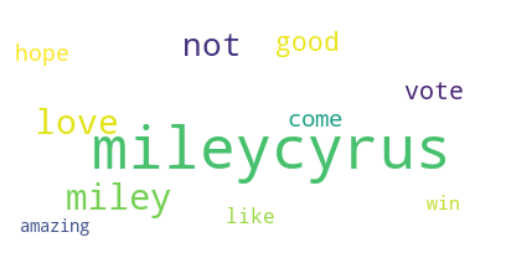

In [143]:
# Creando objeto WordCloud para @mileycyrus
wordcloud1 = WordCloud(background_color='white')
wordcloud1.generate_from_frequencies(top10dict)

# Graficando WordCloud
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

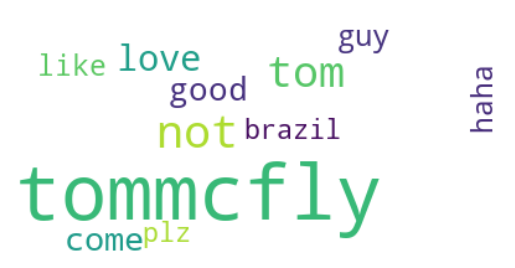

In [144]:
# Creando objeto WordCloud para @tommcfly
wordcloud2 = WordCloud(background_color='white')
wordcloud2.generate_from_frequencies(top10dict2)

# Graficando WordCloud
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

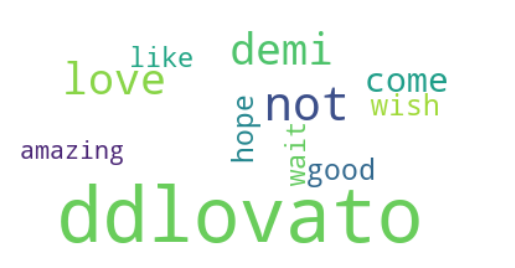

In [145]:
# Creando objeto WordCloud para @ddlovato
wordcloud3 = WordCloud(background_color='white')
wordcloud3.generate_from_frequencies(top10dict3)

# Graficando WordCloud
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

### Conclusiones:

Los tres usuarios más populares en los tweets analizados son @mileycyrus, @tommcfly y @ddlovato. Dos de estos usuarios son artistas famosas. Al extraer el top 10 de palabras que más rodean a estos nombres de usuarios y graficarlos en los Wordclouds, encontramos que las palabras son muy similares y hacen alución a temas comunes en canciones así como palabras de admiración, que probablemente se refieren a comentarios positivos de fanáticos de los usuarios.